# Day 3 Frequentist Statistics

In [1]:
using PyPlot
using Distributions
using DelimitedFiles
using Statistics
using StatsBase
using Random
Random.seed!(1234)
using HypothesisTests

3.1 Interval estimation      
3.2 Hypothesis testing  
3.3 Some common tests  
3.4 Summary and additional questions  

## 3.0 Recap of Last Week...

* Common distributions: Bernoulli, Binomial, Poisson, Normal, Gamma and $\chi^2$  


* Characteristic functions $\phi_X(t)=\langle e^{itX} \rangle$  


* Statistics of a sample $X_1$, $X_2, \cdots, X_n$ from a population with $\mu$ and $\sigma^2$


$\hspace{0.8cm}$ sample mean $\overline{X}=\frac{1}{n}\sum_{k=1}^nX_n$ where $\langle \overline{X} \rangle=\mu$ 


$\hspace{0.8cm}$ sample variance $s^2_u=\frac{1}{n-1}\sum_{k=1}^n(X_k-\overline{X})^2$ where $\langle s_u^2\rangle=\sigma^2$


* Law of large numbers $\overline{X}_n\to\mu$ for many samples


* Central limit theorem: distribution of $\overline{X}_n$ tends to a normal   
with mean $\mu$ and variance $\sigma^2/n$. NB $\sigma/n^{1/2}$ is the **standard error on mean**.


## 3.1 Interval Estimation


3.1.1 Analysis of house-price data  
3.1.2 Confidence intervals  
3.1.3 Question on confidence intervals

### 3.1.1 Analysis of House Prices Data

* UK House price data. 374,043 properties less than or equal to £2M by Nov 2020.


* Population mean=£290k and std=£234k so highly skewed distribution.


* Imagine we draw a sample of $n=50$.


* For a particular sample we get point esimations:  
sample mean $\mu_s=$£312k, sample std $\sigma_s$=£213k and standard error on mean $\sigma_{sem}=$£30k



* How can we estimate a range that the population mean might be in?


* Let the $95\%$ confidence interval be the range encompassing the central 95$\%$   
of the normal distribution with $\mu_s$, $\sigma_s$.  


* **<font color='red'>Question:</font>** Use ```invlogcdf``` in the Distributions package to find this range.


In [2]:
μ = 312
σ = 30
zL = invlogcdf(Normal(), log(0.975))
range_l = μ - zL * σ
range_r = μ + zL * σ
@show range_l, range_r

(range_l, range_r) = (253.20108046379826, 370.7989195362017)


(253.20108046379826, 370.7989195362017)

* **<font color='green'>Answer:</font>** 

$\hspace{0.8cm}$ zL=invlogcdf(Normal(),log(0.025))=-1.96  
$\hspace{0.8cm}$ p=£312k $\pm$ zL*£30k$~=~$£253k$\to$£371k 


 * So the confidence interval is between £253k to £371k


In [3]:
# load data
M=readdlm("pp-2020.csv",',')
L,l=size(M);

P=M[:,2]
s2M=findall(P.<=2000000)
P2M=P[s2M]/1000; # measure prices in £k

# prices less than or equal to £2M are in the vector P2M

Random.seed!(12)

# sample means
ns=50
N=10000;

# one sample first
samp=rand(P2M,ns)
Esampmean=mean(samp)
Esampvar=var(samp)
Esampstd=std(samp)
Esampsem=Esampstd/sqrt(ns)

# now repeated samples
R=mean(rand(P2M,N,ns),dims=2);

# and population data
popmean=mean(P2M);
popvar=var(P2M);
popstd=std(P2M);
popsem=popstd/sqrt(ns);

println("Number in 2020 £2M is $(length(P2M))")
println("ns=$ns sample:\t mean=$(round(Esampmean;digits=0))k std=$(round(Esampstd;digits=0))k so sem=$(round(Esampsem;digits=0))k")
println("The population\t mean=$(round(popmean;digits=0))k std=$(round(popstd;digits=0))k ")


Number in 2020 £2M is 374043
ns=50 sample:	 mean=226.0k std=109.0k so sem=15.0k
The population	 mean=290.0k std=234.0k 


In [4]:
# get 95% confidence intervals 

zL=invlogcdf.(Normal(),log(0.025))
zR=invlogcdf.(Normal(),log(1-0.025))
PL=zL*Esampsem+Esampmean
PR=zR*Esampsem+Esampmean

# for the sample example
xE=Esampmean-5*Esampsem:1:Esampmean+5*Esampsem;
yE=pdf.(Normal(Esampmean,Esampsem),xE)    

xEL=collect(xE[1]:0.01:PL);
yEL=pdf.(Normal(Esampmean,Esampsem),xEL);

xER=collect(PR:0.01:xE[end])
yER=pdf.(Normal(Esampmean,Esampsem),xER)

# statistics of sample means
xP=popmean-5*popsem:1:popmean+5*popsem
yP=pdf.(Normal(popmean,popsem),xP);

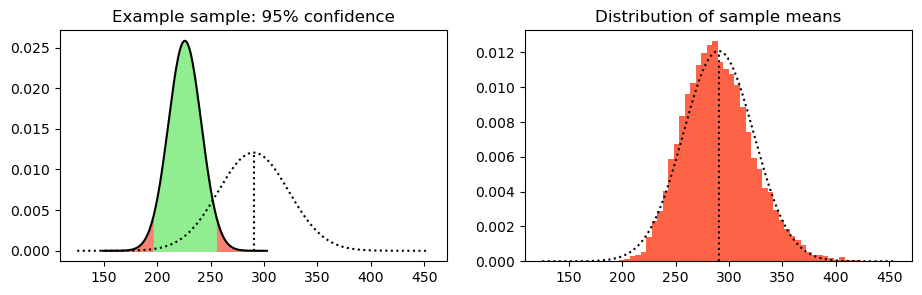

In [5]:
figure(figsize=(11,3)); tight_layout;

subplot(121); plot(xE,yE,"k-",xP,yP,"k:"); 
plot(popmean*[1,1],[0,maximum(yP)],"k:"); 
title("Example sample: 95% confidence"); fill_between(xE,0,yE,color="lightgreen");
fill_between(xEL,0,yEL,color="salmon"); fill_between(xER,0,yER,color="salmon")

subplot(122);plt.hist(R,50,density=true,color="tomato");
plot(popmean*[1,1],[0,maximum(yP)],"k:"); 
plot(xP,yP,"k:"); title("Distribution of sample means");

### 3.1.2 Confidence Intervals

* **NB** Confidence intervals are random quantities - depend on a sample.


* Often misunderstood! 


* A 95$\%$ confidence interval means that 95$\%$ of confidence intervals will include the population mean. 


* In frequentist statistics the population mean is **not** considered a random quantity that would have some probability of taking a particular value.   

## 3.1.3 <font color='red'>Question:</font> Confidence Intervals

* 100 samples from a chocolate-bar machine had weights with   
mean $\mu_s=101$g and standard deviation $\sigma_s$=$5$g.


* Give 99$\%$ confidence limits for the mean weight of all bars made.

Let $\bar{X} = \frac{1}{100} \sum_{i=1}^{100} X_i$, then $\mathbb{Var}[\bar{X}] = \frac{1}{100^2} \sum_{i=1}^{100} \mathbb{Var}[X_i] = \frac{1}{100} \mathbb{Var}[X_i]$. But we don't know $\mathbb{Var}[X_i]$. So we need to make a $t$-test instead.

We know the estimator
$$
\frac{\bar{X} - \mu}{\sqrt{S^2/100}} \sim t(99).
$$

So the $99\%$ confidence interval for $\mu$ is 
$$
[t(99)_{0.005} \times \sqrt{S^2/100} + \bar{X}, t(99)_{0.995} \times \sqrt{S^2/100} + \bar{X}].
$$

In [6]:
left = invlogcdf(TDist(99), log(0.005))
right = invlogcdf(TDist(99), log(0.995))

interval_left = left * sqrt(25/100) + 101
interval_right = right * sqrt(25/100) + 101

@show interval_left, interval_right

(interval_left, interval_right) = (99.68679727135958, 102.31320272864042)


(99.68679727135958, 102.31320272864042)

* Since we have a large sample size ($100$), using Gaussian test and t test will result in similar answers.

* Standard error on the mean is $5/\sqrt{100}=0.5$


* For a standard normal invlogcdf(Normal(),log(0.005))=-2.576


* Hence the weight range is $-2.576*0.5+101$ to $2.576*0.5+101$   
which is 99.7g to 102.3g.


## 3.2 Hypothesis testing

3.2.1  Type I and Type II errors  
3.2.2  Significance and p-values  
3.2.3  Type II errors and operator curves

### 3.2.1 Type I and Type II Errors


* Want to distinguish between a null hypothesis $H_0$ and other hypothesis $H_1$ etc .


* Frequentist statistics: concerned with decisions made about the null hypothesis.


* Four possibilities: null can be true or false and we can accept or reject it.

    | $~$ | true | false |
    |---: | :---- | :--- |
    | **accept** | success | type-II error |
    | **reject** | type-I error | success |  


* Type I error: probability reject a true null hypothesis $P($reject$~ | ~$null true$)$  
Use $\alpha$ for type-I error "rate". Can be considered an error of commission.


* Type II error: we accept a false null hypothesis  $P($accept$~ | ~$null false$)$  
Use $\beta$ for type-II error "rate". Can be considered an error of omission


* Type I errors tend to be main focus.  
Related to **falsifiability** of an existing theory.  
Fits with Popper's idea of good theories being falsifiable. 

### 3.2.2 Type I and II Error Examples

* 100 patients are tested for stroke using a new, quick test   
* The null hypothesis is that patients are healthy.  
* Health or stroke is then confirmed clinically, later. 


| $~$ | healthy | stroke |
|---| --- | ---|
| **test predicts healthy** | 88 |4 |
| **test predicts stroke** | 2  | 6 |


* **<font color="red">Question:</font>** What is the type-I error rate?  


* **<font color="red">Question:</font>** What is the type-II error rate?   

| $~$ | healthy | stroke | |
|---| --- | ---| ---|
| **predicts healthy** | 88 |4 | 92 |
| **test predicts stroke** | 2  | 6 | 8 |
| $~$ | 90 | 10 | 100 |


* **<font color="green">Answer:</font>** What is the type-I error rate?  
$P($predict stroke$~ | ~$healthy$)=1/45$ 


* **<font color="green">Answer:</font>** What is the type-II error rate?  
$P($predict healthy$~ | ~$stroke$)=2/5$   


* **NOTE** There are other quantities that sound similar.   
$P($healthy$~ | ~$predict stroke$)$   
$P($stroke$~ | ~$predict healthy$)$  


* Frequentist $~\sim P($Data$~ | ~$Null hypothesis$ )$  
* Bayesian $~\sim P($Hypotheses$~ | ~$Data$)$

### 3.2.3 Significance and p-Values


The **p-value** is the probability you get the results you found or something more extreme, given the null hypothesis is true.  

**Example** Test if a coin is fair - this is the **null** hypothesis.


* We imagine doing one experiment with $n$ flips.


* If coin not fair anticipate result will look unlikely from null statistics.


* We fix ahead a probability level $\alpha$ - the **significance** - type I error rate.  
This the level at which we reject the null because result unlikely if null true.  
Typically this is set at $5\%$ or $1\%$.


* Do an experiment and measure the p-value. The probability 

**Experiment**   
Coin flip gives 7 heads out of 8 flips. What is the p-value? Is it significant at $5\%$?


|heads | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 
|:---  |---|---|---|---|---|---|---|---|---|
|**prob** | 0.004 | 0.0312 | 0.1094 | 0.2188 | 0.2734 | 0.2188 | 0.1094 | 0.0312 | 0.004 |


* As extreme is 0,1 7 or 8 heads so p-value is $2\times(0.004+0.0312)=7\% $.
* Call this **Not sigificant** as greater that then $\alpha=5\%$ cut-off.
* This is a two sided test. 


* Imagine if we were testing if the coin was biased towards heads.  
As extreme are 7 or 8, so p-value$=3.5\%$ which is significant at the $5\%$ level.

### 3.2.4 <font color='red'>Question</font> Significance and p-Values


* A nationwide school test has mean mark $\mu=75$ with standard dev. $\sigma=7$.
* A particular school with 30 children has a mean mark $\mu_s=72$ .


* **<font color='red'>Question.</font>** Is the school significantly different from the national average?  
Give the p-value and compare to $5\%$.



* Hint 1: use cdf(Normal()) to calculate the area under the normal curve.
* Hint 2: you can use invlogcdf to go from the cdf to x, when necessary.


* **<font color='green'>Answer.</font>** The standard error on the mean is $7/\sqrt{30}=1.278$.
* Null sample-mean distribution: normal with mean $\mu_s=75$, $\sigma_s=1.278$.

* This sample mean: $z=(72-\mu_s)/\sigma_s=-2.35$ deviations from mean.
* cdf(Normal(),-2.35)=0.0094 so p-value$=1.8\%$   
signifance at 5$\%$ but not 1$\%$.  


* **NB** It's a two-sided test so $2\times0.0094=1.8\%$.


In [7]:
mus,sigs=75,1.278
x1=mus-5*sigs:0.01:mus+5*sigs
y1=pdf.(Normal(mus,sigs),x1);

# Two-sided test at 95%
zL=invlogcdf.(Normal(),log(0.025));   xL=zL*sigs + mus
zR=invlogcdf.(Normal(),log(1-0.025)); xR=zR*sigs + mus

x2=x1[1]:0.01:xL
y2=pdf.(Normal(mus,sigs),x2);

x3=xR:0.01:x1[end]
y3=pdf.(Normal(mus,sigs),x3);

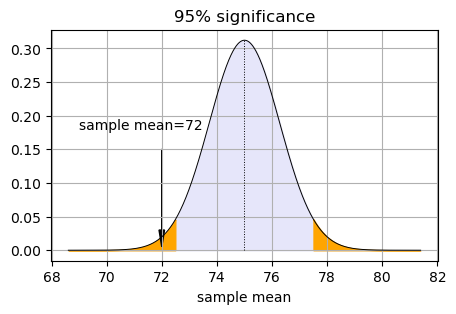

In [8]:
figure(figsize=(5,3))
fill_between(x1,0,y1,color="lavender"); fill_between(x2,0,y2,color="orange")
fill_between(x3,0,y3,color="orange"); grid(); text(69,0.18,"sample mean=72")
plot(x1,y1,"k",linewidth=0.7); title("95% significance")
plot([75,75],[0,maximum(y1)],"k:",linewidth=0.7); xlabel("sample mean")
arrow(72,0.15,0,-0.12, head_width=0.2, head_length=0.025, fc="k", ec="k");

### 3.2.5 Type II Errors and Operator Curves

* Decide coin fair: 100 flips there are between $40$ and $60$ heads (inclusive).


* The type I error rate is therefore $\alpha=0.0352$.


* Imagine $p=0.6$   

**<font color='red'>Question:</font>** what is the type II error $\beta$?

**<font color='green'>Answer:</font>** $\beta=\sum_{k=40}^{60}$Binom$(k;n=100,p=0.6)=0.538$

* Remember $\beta$ is the **probability accept null given it is false**


* At $p=0.7$ it has dropped to $\beta=0.021$ or 2$\%$ chance.


* Plot $\beta$ as a function of $p$. This is the operator curve.

In [9]:
x=collect(0:100)
x1,x2=40,60
xx=collect(x1:x2)

y0=pdf.(Binomial(100,0.5),x);
yy0=pdf.(Binomial(100,0.5),xx);
s1=findall(x.==x1)[1];
s2=findall(x.==x2)[1];

p1,p2=0.4,0.6
y1=pdf.(Binomial(100,p1),x)
y2=pdf.(Binomial(100,p2),x)

# type one error
a=1-sum(y0[s1:s2])

pr=collect(0.1:0.01:0.9);
np=length(pr)
br=zeros(np)
for k=1:np
    yr=pdf.(Binomial(100,pr[k]),x)
    br[k]=sum(yr[s1:s2])
end

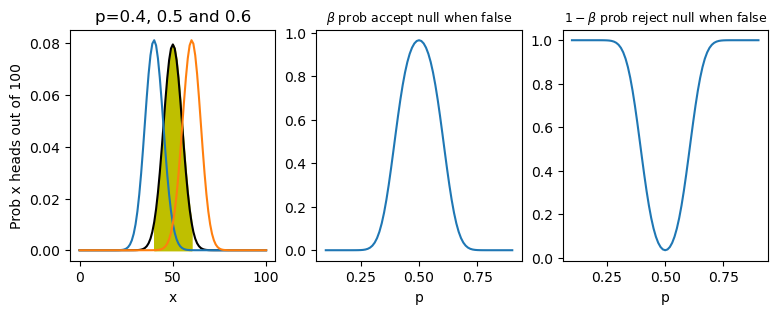

In [10]:
figure(figsize=(9,3)); tight_layout;
subplot(131); plot(x,y0,"k-",x,y1,x,y2); xlabel("x");
fill_between(xx,0,yy0,color="y")
ylabel("Prob x heads out of 100");   title("p=$p1, 0.5 and $p2")
subplot(132); plot(pr,br); xlabel("p"); 
title(L"$\beta$ prob accept null when false",fontsize=9);
subplot(133); plot(pr,1.0 .-br); xlabel("p"); 
title(L"$1-\beta$ prob reject null when false",fontsize=9);

## 3.3 Some Common Tests

3.3.1 One-sample test  
3.3.2 Two-sample test  
3.3.3 Student's t test  
3.3.4 Chi-square test  

### 3.3.1 One-Sample Test

* Consider the sample mean $\overline{X}$ of a set $\{X_k \}$of $n$ random numbers.


* Assume $n$ sufficiently large that the sample-mean distribution is normal.


* Get an unbiased estimate of population $\sigma$ from data ($n$ should be big for this).


* Null hypothesis is that the sample mean is $\mu_0$ (often $0$, as can subtract this out).


* This is called a **z-test**: examine z-statistic $z=(\overline{X}-\mu_0)/(\sigma/\sqrt{n})$ for significance 



In [11]:
n=10
X=randn(n) .+0.1; 
mx=mean(X); sx=std(X); semx=sx/sqrt(n); 
zscore=mx/semx; pvalue=2*cdf.(Normal(),-abs(zscore))
println("X=$(round.(X;digits=2))")
println("mean(X)=$(round(mx;digits=3)) and sem(X)=$(round(semx;digits=3))")
println("z-score=$(round(zscore;digits=3)) and pvalue=$(round(pvalue;digits=3))")
println("------------------------------")
OneSampleZTest(X)

X=[0.69, 2.16, 0.39, 1.83, -1.4, -1.01, -0.76, 0.48, 0.11, -1.71]
mean(X)=0.078 and sem(X)=0.412
z-score=0.19 and pvalue=0.849
------------------------------


One sample z-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.0783452
    95% confidence interval: (-0.7285, 0.8852)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.8491

Details:
    number of observations:   10
    z-statistic:              0.19030222729692908
    population standard error: 0.41168846873829296


### 3.3.2 Two-Sample Test

* Now consider we have two sets of number $\{X_k\}$ and $\{Y_k\}$ 


* There are $n_x$ and $n_y$ of these, the sample means are $\overline{X}$ and $\overline{Y}$ and the population variance esimators $\sigma_x$ and $\sigma_y$.


* Are the sample means the same or different? Consider statistics of $\overline{X}-\overline{Y}$


* The variance of the difference is $\sigma_x^2/n_x+\sigma_y^2/n_y$.


* The test statistic is therefore $z=\frac{(\overline{X}-\overline{Y})}{\sqrt{\sigma_x^2/n_x+\sigma_y^2/n_y}}$ which we test for significance.

In [12]:
nx=10; X=randn(nx) .+0.1; 
ny=15; Y=1.2*randn(ny) .+0.2;
UnequalVarianceZTest(X,Y)

Two sample z-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -0.796148
    95% confidence interval: (-1.4617, -0.1306)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0190

Details:
    number of observations:   [10,15]
    z-statistic:              -2.344697897538652
    population standard error: 0.3395523668475668


### 3.3.3 Student's $t$ Test

* Developed for small sample where typically $n\leq30$ is quoted.
* The z-score comes from a standardised normal $z=(\bar{X}-\mu)/(\sigma/\sqrt{n})$  


* Previously assumed that esimate $s^2_u$ for population $\sigma^2$ is sharp


* But $s^2_u$ is a random number too increasing uncertainty  
  distribution $t=(\bar{X}-\mu)/(s_u/\sqrt{n})$ is **not** normal  


* Follows t-distribution (if samples normal). $Y=Y_0(1+t^2/(n-1))^{-n/2}$.  
similar to normal, but tails fatter 


* t-tests are preformed exactly like z-tests.

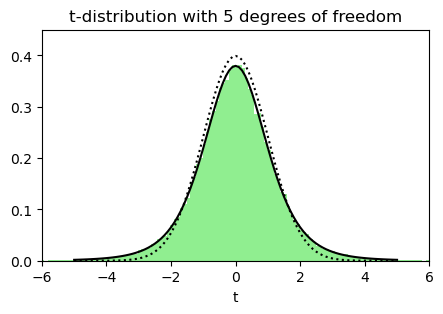

PyObject Text(0.5, 1.0, 't-distribution with 5 degrees of freedom')

In [13]:
# example
N,n=100000,6
M=randn(N,n);
Sm=mean(M,dims=2)
Sv=var(M,dims=2)
t=Sm./sqrt.(Sv/n);

figure(figsize=(5,3))
x=-5:0.1:5
y1=pdf.(Normal(),x)
y2=pdf.(TDist(n-1),x)
plt.hist(t,400,density=5,color="lightgreen");
plot(x,y1,"k:",x,y2,"k-"); xlabel("t")
axis([-6,6,0,0.45]); title("t-distribution with $(n-1) degrees of freedom")

### 3.3.4 $\chi^2$ Test

* This test is used for seeing if a distribution of numbers is as expected.


* Let $a_k$ where $k=1\cdots n$ be the measured frequency and $b_k$ that expected.


* The test statistics is $\chi^2=\sum_{k=1}^n\frac{(a_k-b_k)^2}{b_k}$.


* It has a sampling distribution is $Y(\chi^2)=\frac{1}{2^{\nu/2}\Gamma(\nu/2)}(\chi^2)^{(\nu-2)/2}e^{-\chi^2/2}$  
where $\nu=n-1$. This is a $\chi^2$ distribution with $n-1$ degrees of freedom.

**<font color='red'>Question:</font>** A six-sided die is rolled 120 times with frequencies:

| 1  | 2   | 3   | 4   | 5   | 6   |
| ---| --- | --- | --- | --- | --- |
|   17 | 14    | 19    | 15    | 21    |  34   |

 Is the die a fair one? Test at $95\%$ and $99\%$ and give the p-value. 

* The test statistics is $\chi^2=\sum_{k=1}^n\frac{(a_k-b_k)^2}{b_k}$.


* It has a sampling distribution is $Y(\chi^2)=\frac{1}{2^{\nu/2}\Gamma(\nu/2)}(\chi^2)^{(\nu-2)/2}e^{-\chi^2/2}$   
where $\nu=n-1$. This is a $\chi^2$ distribution with $n-1$ degrees of freedom.


**<font color='green'>Answer:</font>** A six-sided die is rolled 120 times with frequencies:

| 1  | 2   | 3   | 4   | 5   | 6   |
| ---| --- | --- | --- | --- | --- |
|   17 | 14    | 19    | 15    | 21    |  34   |  

$\chi^2=3^2/20+6^2/20+1^2/20+5^2/20+1^2/20+14^2/20=13.4$      
and $\nu=6-1=5$.

In [14]:
a=[17.0, 14.0, 19.0, 15.0, 21.0, 34.0];
b=[20.0, 20.0, 20.0, 20.0, 20.0, 20.0];
chi2=sum((a-b).^2 ./ b)
pvalue=1-cdf.(Chisq(5),chi2)
xx95=invlogcdf.(Chisq(5),log(0.95))
xx99=invlogcdf.(Chisq(5),log(0.99))

xx1=collect(0.01:0.01:20); y1=pdf.(Chisq(5),xx1);
xx2=collect(xx95:0.01:xx1[end]); y2=pdf.(Chisq(5),xx2);
xx3=collect(xx99:0.01:xx1[end]); y3=pdf.(Chisq(5),xx3);

println("chi2=$chi2 pvalue=$(round(pvalue;digits=4)) xx95=$(round(xx95;digits=4)) xx99=$(round(xx99;digits=4))")

chi2=13.4 pvalue=0.0199 xx95=11.0705 xx99=15.0863


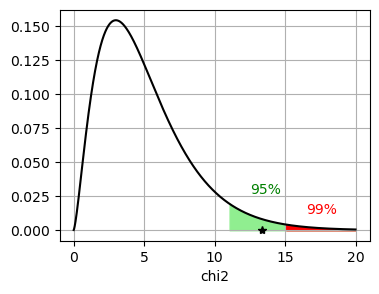

In [15]:
figure(figsize=(4,3))
plot(xx1,y1,"k-"); xlabel("chi2"); plot(chi2,0,"k*")
fill_between(xx2,0,y2,color="lightgreen"); text(12.5,0.027,"95%",color="green")
fill_between(xx3,0,y3,color="r"); text(16.5,0.012,"99%",color="r")
grid("on")

In [16]:
# can also use one of the HypothesisTests commands...

aInt=Int.(a);
ChisqTest(aInt)

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.166667, 0.166667, 0.166667, 0.166667, 0.166667, 0.166667]
    point estimate:          [0.141667, 0.116667, 0.158333, 0.125, 0.175, 0.283333]
    95% confidence interval: [(0.0583, 0.2321), (0.0333, 0.2071), (0.075, 0.2487), (0.0417, 0.2154), (0.0917, 0.2654), (0.2, 0.3737)]

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           0.0199

Details:
    Sample size:        120
    statistic:          13.399999999999995
    degrees of freedom: 5
    residuals:          [-0.67082, -1.34164, -0.223607, -1.11803, 0.223607, 3.1305]
    std. residuals:     [-0.734847, -1.46969, -0.244949, -1.22474, 0.244949, 3.42929]


## 3.4 Summary and Additional Questions

### Day 3: Frequentist Approaches

3.1 Interval estimation      
3.2 Hypothesis testing  
3.3 Additional topics  
3.4 Summary and homework questions 

## Questions

Make sure you have understood and done all the questions in the lectures.

The questions below are to be emailed in for marking by 12noon Thursday 26th November 2020    
**NB** there will also be questions from the Day 4 lectures to be handed in on the 26th November as well.

**Q3.4.1** Spotting fake financial data  
**Q3.4.2** One-sided and two-sided test differences   
**Q3.4.3** Limit of Student's t-distribution.

### <font color='red'>Q3.4.1</font> Spotting Fake Data

* The first non-zero digits of numbers in many real-world data sets do not follow a uniform distribution.
* This observation is called Benford's law, where $P(d)=\log_{10}(1+1/d)$ for $d=1\cdots9$
* When financial data is naively faked, a uniform random number generator is often used. 
* Download the following csv file from the [Nasdaq archive](old.nasdaq.com/screening/companies-by-industry.aspx?exchange=NASDAQ&render=download).
* The third column is the current stock prices. The data has some entries that are "n/a" which you need to clean up.

* **Part (a)** For a random  sample of 45 stocks, plot the distribution of the first digits of the stock prices.

* **Part (b)** Use the Chi-square test to check if the distribution is significantly different from a uniform distribution and from Benford's law. Give the p-value for these two tests.

* **Part (c)** Increase the sample to 450. Comment on what happens to the significance test in respect to Benford's law.

### <font color='red'>Q3.4.2</font> One-Sided and Two-Sided Test Differences

* Refer back to the question in section 3.2.4 on the nationwide school test.


* A nationwide school test has mean mark $\mu=75$ with standard dev. $\sigma=7$.
* A particular school with 30 children has a mean mark $\overline{X}=72$ .


* Test the data for the question:   
Is the school underpreforming?   
What is the p-value and compare it to $5\%$ or $1\%$ significances.


### <font color='red'>Q3.4.3</font> Limit of Student's $t$-Distribution

* **Part (a)**  Student's t-distribution is 


$\hspace{0.8cm}$ $f(t)=\frac{1}{\sqrt{\nu\pi}}\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right)}\frac{1}{\left(1+t^2/\nu\right)^{(\nu+1)/2}}$


$\hspace{8mm}$where $\nu=n-1$ is the number of degrees of freedom. 

*  Demontrate that in the limit of large $n$ this distribution tends to a standard normal.



* **Part(b)** Show that for large $\nu$ the leading order correction to the variance is $\sigma^2\simeq1+2/\nu$ and therefore larger than that of the standard normal.